In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [49]:
le = preprocessing.LabelEncoder()

In [3]:
df = pd.read_csv("/home/jatin/ML & AI/general_data.csv")

In [7]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
df.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# -->>UNIVARIATE ANALYSIS

In [32]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].describe()


In [33]:
df1.T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,4401.0,11.279936,7.782222,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,4410.0,7.008163,6.125135,0.0,3.0,5.0,9.0,40.0
YearsSinceLastPromotion,4410.0,2.187755,3.221699,0.0,0.0,1.0,3.0,15.0


In [35]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].median()

In [36]:
df1.T

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [37]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].mode()
df1.T

,0
Age,35.0
DistanceFromHome,2.0
Education,3.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0
YearsSinceLastPromotion,0.0


In [38]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].var()
df1.T

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [39]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].skew()
df1.T

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [40]:
df1 = df[['Age','DistanceFromHome','Education','MonthlyIncome',
          'NumCompaniesWorked','PercentSalaryHike',
          'TotalWorkingYears','TrainingTimesLastYear',
          'YearsAtCompany','YearsSinceLastPromotion',
          'YearsWithCurrManager']].kurt()
df1.T

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

# Inference from the analysis:-

# Visual Interpretation

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3fe0e7f990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fe2a13b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3fe0e7f350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fe1333a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fe0e18e50>],
 'means': []}

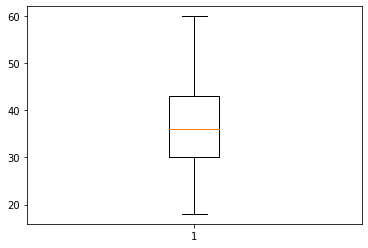

In [44]:
plt.boxplot(df.Age)

-->> Age is normally distributed without any outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3fdb85c310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fdb8b9b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3fdb987e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fdb860c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fdb8d6490>],
 'means': []}

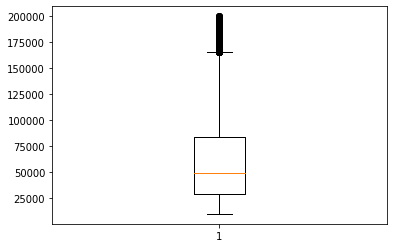

In [45]:
plt.boxplot(df.MonthlyIncome)

-->> Monthly Income is rightly skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3fdb725950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fdb725bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3fdb5eedd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fdb77da90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fdb608690>],
 'means': []}

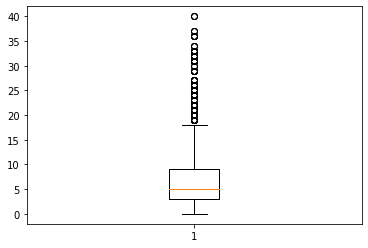

In [46]:
plt.boxplot(df.YearsAtCompany)

-->> Years at company is also Right Skewed with several outliers observed.

In [56]:
 sns.pairplot?

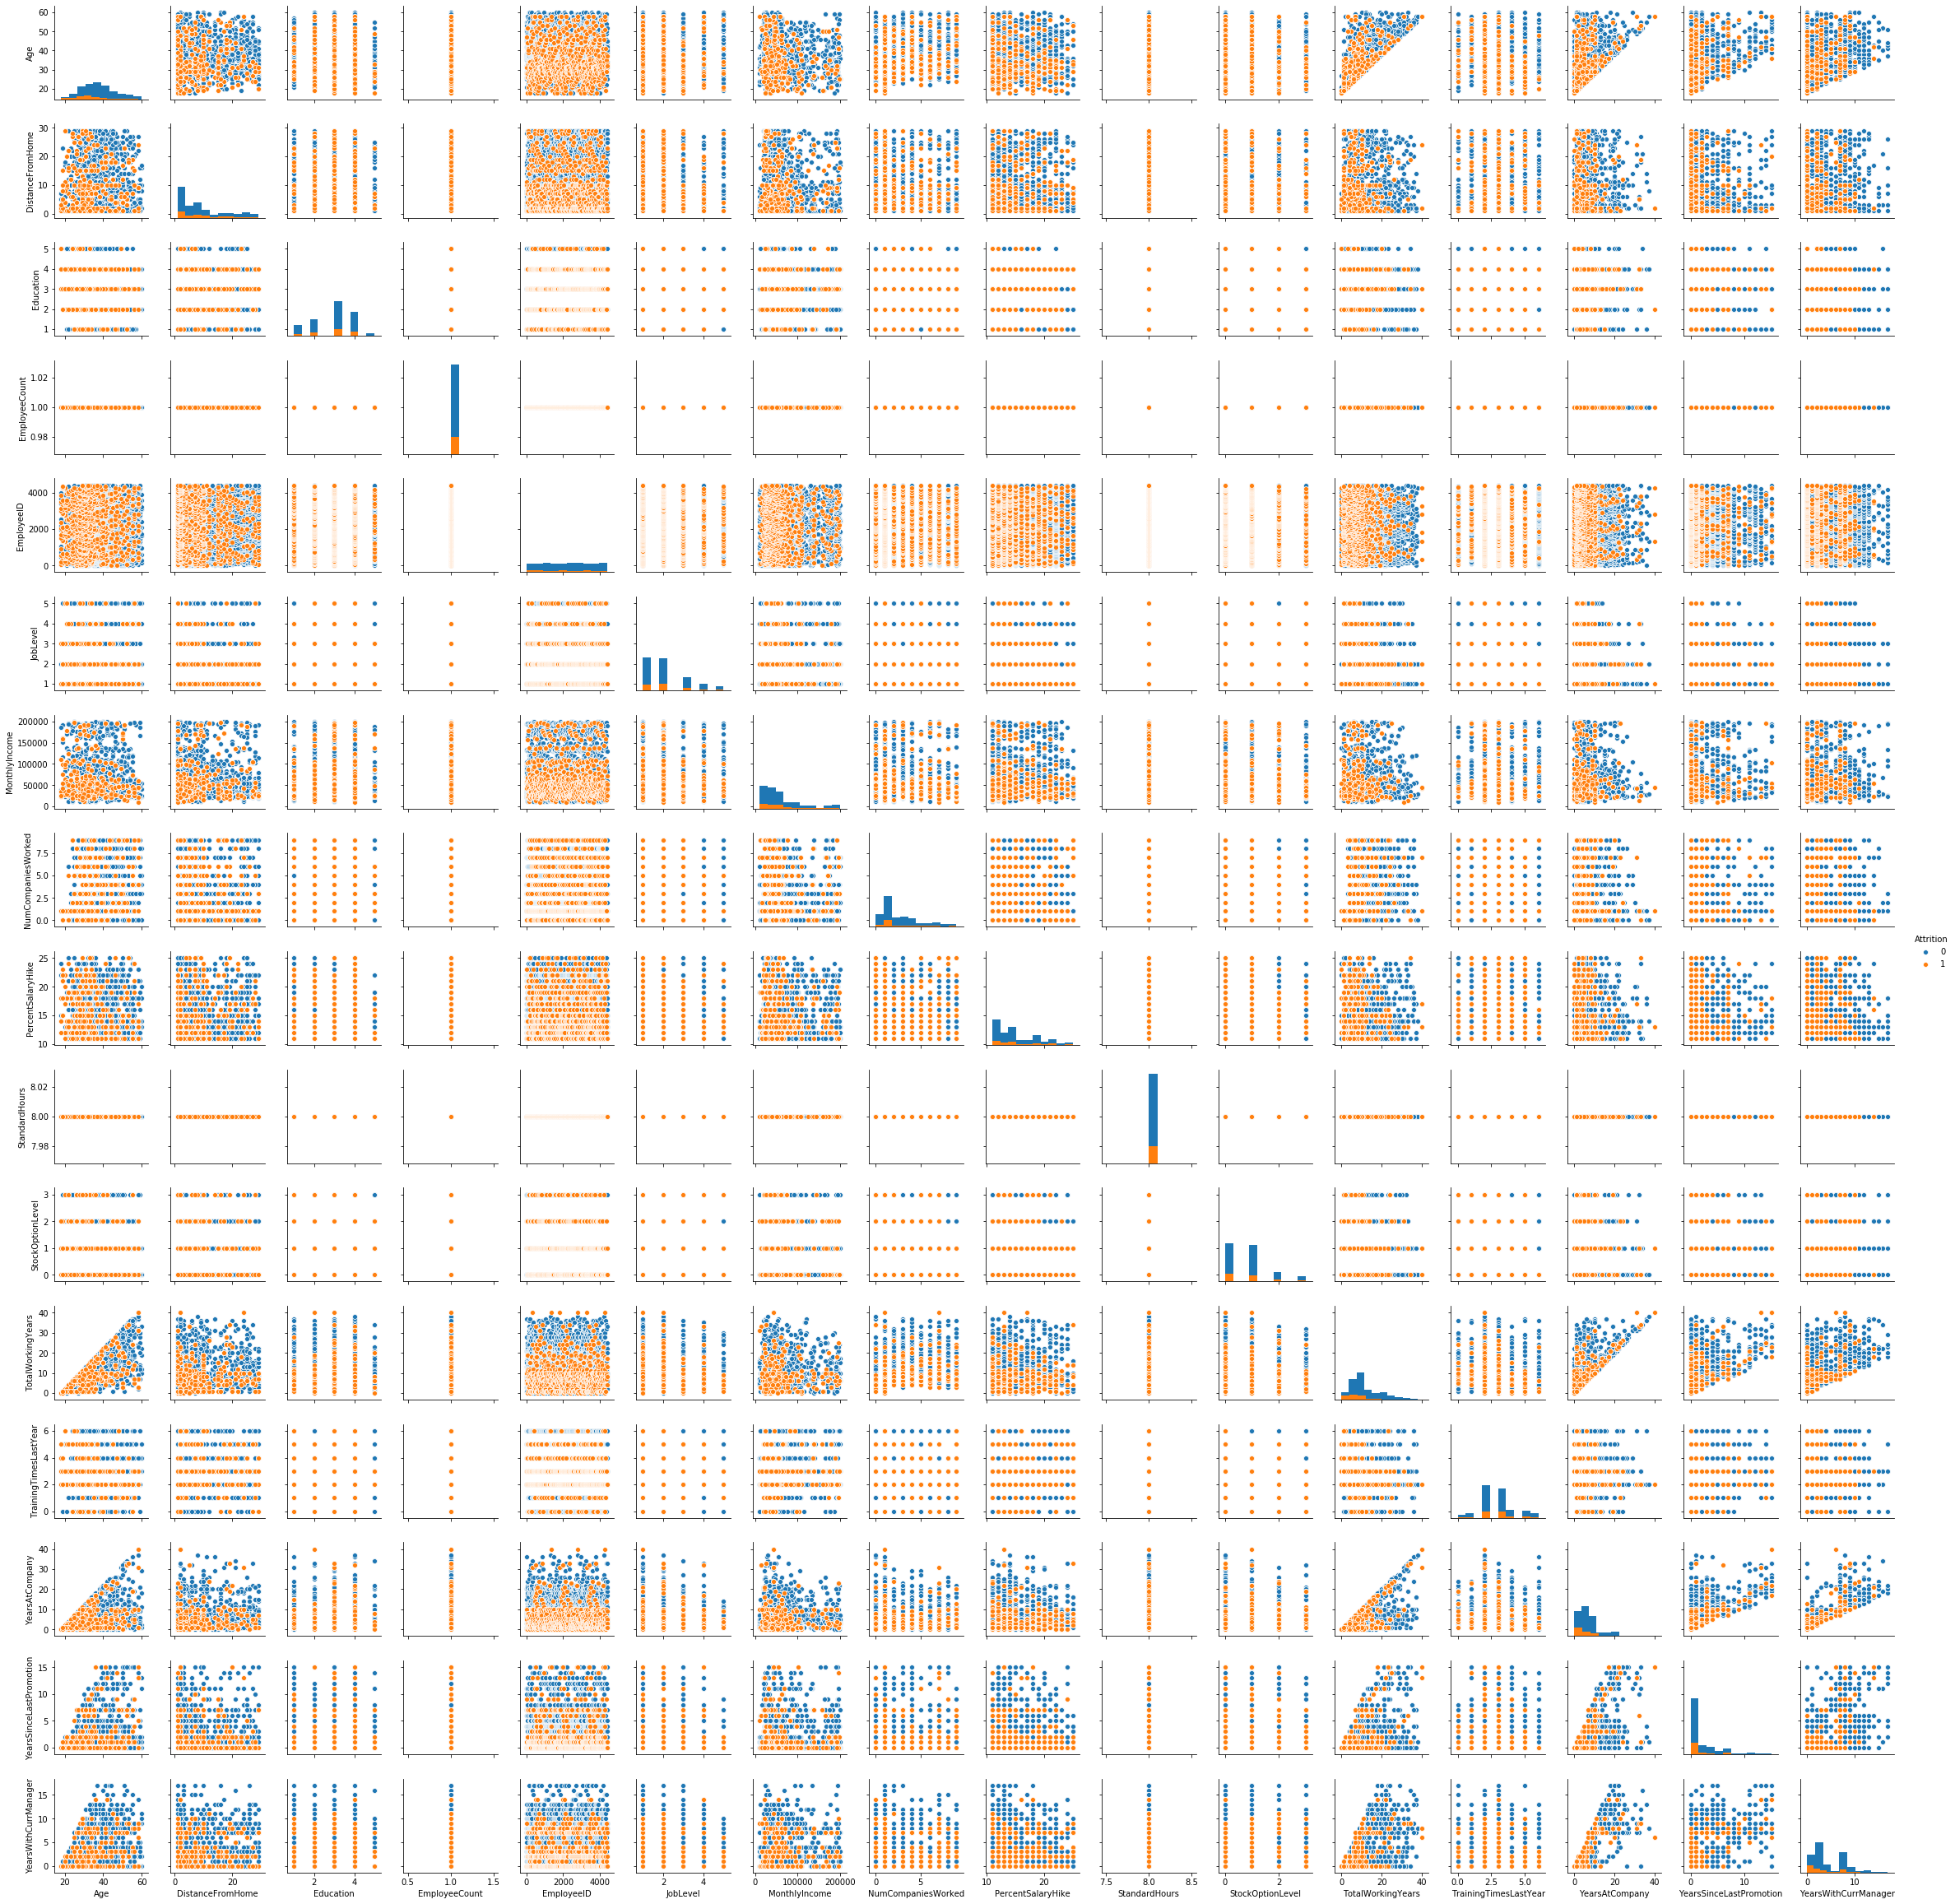

In [67]:
sns.pairplot(df,hue="Attrition",height=2.0,diag_kind='hist')

In [72]:
sns.heatmap?

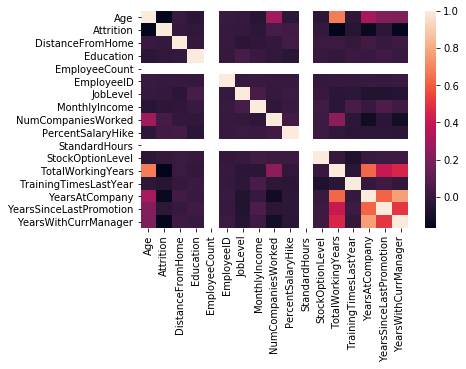

In [75]:
sns.heatmap(df.corr())

# Cleaning the data

In [93]:
data = df

In [94]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,Life Sciences,1,1,0,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,Life Sciences,1,2,0,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,Other,1,3,1,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,Life Sciences,1,4,1,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,Medical,1,5,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


-->> Cleaning Data Function():- 

In [95]:
def clean_data(data):
    data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
    data['Gender'] = le.fit_transform(data['Gender'])
    data['Department'] = le.fit_transform(data['Department'])
    data['EducationField'] = le.fit_transform(data['EducationField'])
    data['JobRole'] = le.fit_transform(data['JobRole'])
    data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.drop(['EmployeeCount','EmployeeID','Over18',
                   'StandardHours'],axis=1)
    print(data.head())
    return data
data = clean_data(data)

   Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   51          0               2           2                 6          2   
1   31          1               1           1                10          1   
2   32          0               1           1                17          4   
3   38          0               0           1                 2          5   
4   32          0               2           1                10          1   

   EducationField  Gender  JobLevel  JobRole  MaritalStatus  MonthlyIncome  \
0               1       0         1        0              1         131160   
1               1       0         1        6              2          41890   
2               4       1         4        7              1         193280   
3               1       1         3        1              1          83210   
4               3       1         1        7              2          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  To

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   int64  
 2   BusinessTravel           4382 non-null   int64  
 3   Department               4382 non-null   int64  
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   int64  
 7   Gender                   4382 non-null   int64  
 8   JobLevel                 4382 non-null   int64  
 9   JobRole                  4382 non-null   int64  
 10  MaritalStatus            4382 non-null   int64  
 11  MonthlyIncome            4382 non-null   int64  
 12  NumCompaniesWorked       4382 non-null   float64
 13  PercentSalaryHike        4382 non-null   int64  
 14  StockOptionLevel        

In [97]:
data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [98]:
data.shape

(4382, 20)

In [108]:
y = data['Attrition']
y

0       0
1       1
2       0
3       0
4       0
       ..
4404    0
4405    0
4406    0
4407    0
4408    0
Name: Attrition, Length: 4382, dtype: int64

In [103]:
x = data.drop(["Attrition"],axis=1)
x

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,2,2,4,3,4,0,2,1,2,35390,1.0,18,0,6.0,2,6,1,5
4405,42,2,1,5,4,3,0,1,6,2,60290,3.0,17,1,10.0,5,3,0,2
4406,29,2,1,2,4,3,1,1,2,0,26790,2.0,15,0,10.0,2,3,0,2
4407,25,2,1,25,2,1,1,2,7,1,37020,0.0,20,0,5.0,4,4,1,2


In [104]:
x.shape

(4382, 19)

In [106]:
y.shape

(4382,)

In [119]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=2,oob_score=True)

In [120]:
rf_model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
print('OOB Accuracy::')
print(rf_model.oob_score_)

OOB Accuracy::
0.8391145595618439


In [122]:
for features,imp in zip(x,rf_model.feature_importances_):
    print(features,imp)

Age 0.1588055091173212
BusinessTravel 0.027392072263261902
Department 0.017370045603168585
DistanceFromHome 0.012887996298807693
Education 0.012057958875150956
EducationField 0.023772093947283794
Gender 0.0017119748319553297
JobLevel 0.007367040362808532
JobRole 0.005523134469732449
MaritalStatus 0.08921170663462491
MonthlyIncome 0.023795440903389094
NumCompaniesWorked 0.04813937385422959
PercentSalaryHike 0.007284887661552053
StockOptionLevel 0.0007436946779304705
TotalWorkingYears 0.20171009681420835
TrainingTimesLastYear 0.014506957757589778
YearsAtCompany 0.20198273978462908
YearsSinceLastPromotion 0.00857980296680473
YearsWithCurrManager 0.13715747317555158


In [123]:
predictors = pd.DataFrame([data['Age'],data['TotalWorkingYears'],data['YearsAtCompany']]).T

In [127]:
predictors

,Age,TotalWorkingYears,YearsAtCompany
0,51.0,1.0,1.0
1,31.0,6.0,5.0
2,32.0,5.0,5.0
3,38.0,13.0,8.0
4,32.0,9.0,6.0
...,...,...,...
4404,29.0,6.0,6.0
4405,42.0,10.0,3.0
4406,29.0,10.0,3.0
4407,25.0,5.0,4.0


In [128]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=6,
                                         max_leaf_nodes=8)
tree_model.fit(predictors,y=data['Attrition'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
tree_model.score(predictors,y=data['Attrition'])

0.8491556366955728

[Text(2557.5, 3424.68, 'X[1] <= 1.5\ngini = 0.27\nsamples = 4382\nvalue = [3677, 705]'), Text(1395.0, 2663.64, 'X[0] <= 33.5\ngini = 0.5\nsamples = 273\nvalue = [140, 133]'), Text(930.0, 1902.6, 'X[0] <= 26.5\ngini = 0.495\nsamples = 237\nvalue = [107, 130]'), Text(465.0, 1141.56, 'gini = 0.463\nsamples = 140\nvalue = [51, 89]'), Text(1395.0, 1141.56, 'gini = 0.488\nsamples = 97\nvalue = [56, 41]'), Text(1860.0, 1902.6, 'gini = 0.153\nsamples = 36\nvalue = [33, 3]'), Text(3720.0, 2663.64, 'X[0] <= 33.5\ngini = 0.24\nsamples = 4109\nvalue = [3537, 572]'), Text(2790.0, 1902.6, 'X[2] <= 3.5\ngini = 0.315\nsamples = 1473\nvalue = [1184, 289]'), Text(2325.0, 1141.56, 'X[2] <= 1.5\ngini = 0.425\nsamples = 450\nvalue = [312, 138]'), Text(1860.0, 380.52, 'gini = 0.5\nsamples = 66\nvalue = [33, 33]'), Text(2790.0, 380.52, 'gini = 0.397\nsamples = 384\nvalue = [279, 105]'), Text(3255.0, 1141.56, 'gini = 0.252\nsamples = 1023\nvalue = [872, 151]'), Text(4650.0, 1902.6, 'X[1] <= 39.0\ngini = 0.192

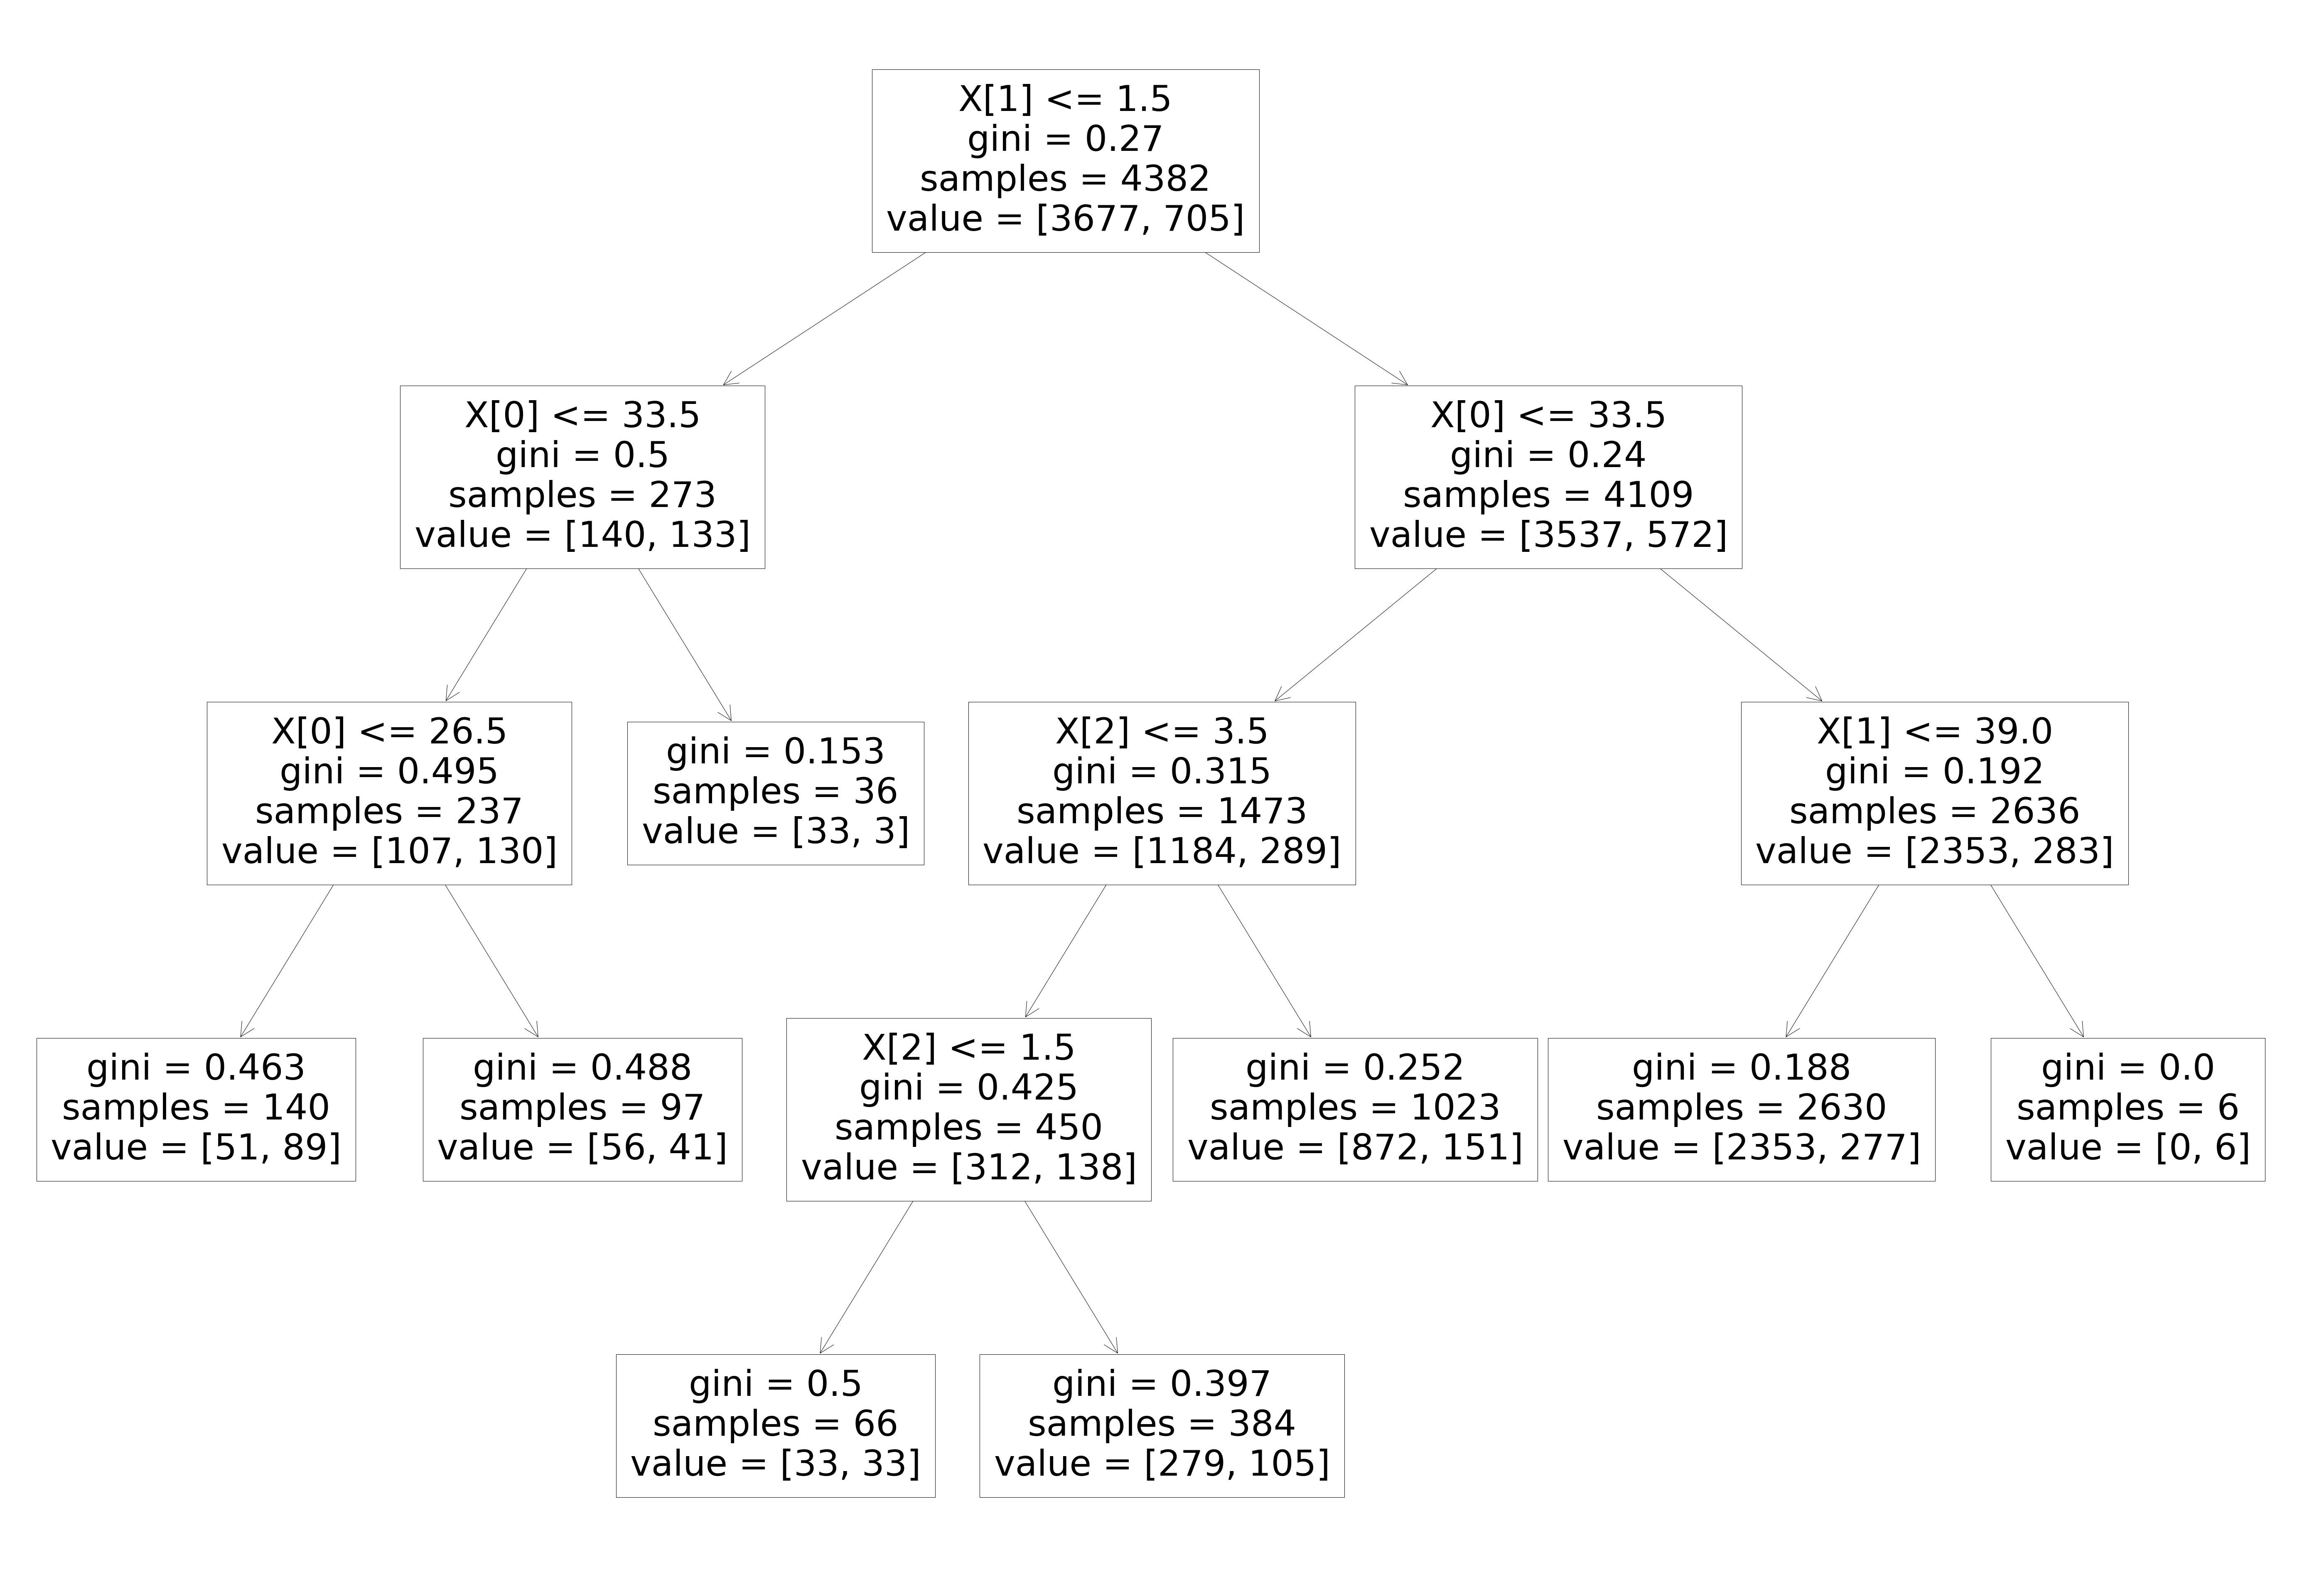

In [132]:
from sklearn.tree import plot_tree
print(plot_tree(tree_model))

In [133]:
with open("Attritiontree.dot",'w') as f:
    f = tree.export_graphviz(tree_model,
                             feature_names=['Age',
                                            'TotalWorkingYears'
                            ,'YearsAtCompany'],out_file=f)
    

In [142]:
y.value_counts(ascending=True)

1     705
0    3677
Name: Attrition, dtype: int64

# Prediction -->>

In [147]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                  test_size=0.20)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train)

[[-0.7577612   0.58332539 -0.49165499 ...  0.64409674 -0.05967165
   0.80766853]
 [ 0.33043194  0.58332539  1.40411039 ... -0.48921605 -0.67663071
  -0.31458249]
 [ 1.20098646  0.58332539 -0.49165499 ... -0.97492153 -0.67663071
  -1.15627076]
 ...
 [-0.43130326  0.58332539 -0.49165499 ... -0.81301971 -0.05967165
  -0.59514525]
 [-0.32248394 -2.45239174 -0.49165499 ... -0.65111788 -0.36815118
  -0.59514525]
 [ 1.09216715  0.58332539 -0.49165499 ... -0.65111788 -0.36815118
  -0.59514525]]


In [146]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance =pca.explained_variance_ratio_
explained_variance

array([0.15877818, 0.07931439, 0.0687728 , 0.06178488, 0.06073299,
       0.05820297, 0.05530395, 0.05384674, 0.05130877, 0.05012198,
       0.04846628, 0.04653057, 0.04441489, 0.04288745, 0.03993114,
       0.03180856, 0.0258915 , 0.0136483 , 0.00825367])

In [161]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=6, random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm  = confusion_matrix(y_test,y_pred)
ac  = accuracy_score(y_test,y_pred)
clr = classification_report(y_test,y_pred)

In [162]:
cm

array([[725,   5],
       [136,  11]])

In [163]:
ac

0.8392246294184721

# Analysis using Logistic Regression-->>


In [165]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [166]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
Logistic_attrition = sm.Logit(y,x1)
result = Logistic_attrition.fit()

/home/jatin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7


In [167]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           19
Date:                Mon, 21 Sep 2020   Pseudo R-squ.:                  0.1093
Time:                        03:00:45   Log-Likelihood:                -1721.8
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 8.681e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0270      0.414      0.065      0.948      -0.785       0.839
Age                        -0.0307      0.007     -4.478      0.000      -0.044      -0.017
BusinessTravel             -0.0137      0.066     -0.209      0.834      -0.143       0.115
Department                 -0.2229      0.082     -2.735      0.006      -0.383      -0.063
DistanceFromHome           -0.0012      0.005     -0.231      0.818      -0.012       0.009
Education                  -0.0664      0.043     -1.555      0.120      -0.150       0.017
EducationField             -0.0954      0.034     -2.849      0.004      -0.161      -0.030
Gender                      0.0855      0.090      0.952      0.341      -0.091       0.262
JobLevel                   -0.0285      0.040     -0.716      0.474      -0.107       0.050
JobRole                     0.0400      0.018      2.226      0.026       0.005       0.075
MaritalStatus               0.5835      0.063      9.212      0.000       0.459       0.708
MonthlyIncome           -1.815e-06   9.57e-07     -1.897      0.058   -3.69e-06    6.01e-08
NumCompaniesWorked          0.1174      0.018      6.390      0.000       0.081       0.153
PercentSalaryHike           0.0126      0.012      1.067      0.286      -0.011       0.036
StockOptionLevel           -0.0675      0.052     -1.302      0.193      -0.169       0.034
TotalWorkingYears          -0.0584      0.012     -4.873      0.000      -0.082      -0.035
TrainingTimesLastYear      -0.1443      0.035     -4.097      0.000      -0.213      -0.075
YearsAtCompany              0.0132      0.018      0.718      0.473      -0.023       0.049
YearsSinceLastPromotion     0.1328      0.020      6.479      0.000       0.093       0.173
YearsWithCurrManager       -0.1394      0.022     -6.288      0.000      -0.183      -0.096
===========================================================================================
"""